In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 
from xml.dom import minidom


In [2]:
from lxml import html, etree
import requests
anime_page = requests.get("https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=172")
print(anime_page.content)


b'<report skipped="0" listed="50">\n<item id="10216"><anime href="/encyclopedia/anime.php?id=10216">Fullmetal Alchemist: Brotherhood (TV)</anime><nb_votes>5817</nb_votes><nb_seen>10861</nb_seen><straight_average>9.106200218200684</straight_average><weighted_average>9.09529972076416</weighted_average><bayesian_average>9.092020988464355</bayesian_average></item>\n<item id="18171"><anime href="/encyclopedia/anime.php?id=18171">your name. (movie)</anime><nb_votes>1101</nb_votes><nb_seen>1482</nb_seen><straight_average>9.104499816894531</straight_average><weighted_average>9.0871000289917</weighted_average><bayesian_average>9.070018768310547</bayesian_average></item>\n<item id="11770"><anime href="/encyclopedia/anime.php?id=11770">Steins;Gate (TV)</anime><nb_votes>4656</nb_votes><nb_seen>6812</nb_seen><straight_average>9.138099670410156</straight_average><weighted_average>9.059100151062012</weighted_average><bayesian_average>9.055099487304688</bayesian_average></item>\n<item id="9701"><anime

In [3]:
from lxml import html, etree
import requests
manga_page = requests.get("https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=173")
print(manga_page.content)

b'<report skipped="0" listed="50">\n<item id="2298"><manga href="/encyclopedia/manga.php?id=2298">Berserk (manga)</manga><nb_votes>1255</nb_votes><nb_seen>2320</nb_seen><straight_average>9.289199829101562</straight_average><weighted_average>9.250699996948242</weighted_average><bayesian_average>9.245918273925781</bayesian_average></item>\n<item id="1511"><manga href="/encyclopedia/manga.php?id=1511">Monster (manga)</manga><nb_votes>786</nb_votes><nb_seen>1321</nb_seen><straight_average>8.944000244140625</straight_average><weighted_average>9.217900276184082</weighted_average><bayesian_average>9.210445404052734</bayesian_average></item>\n<item id="1264"><manga href="/encyclopedia/manga.php?id=1264">Nausica\xc3\xa4 of the Valley of the Wind (manga)</manga><nb_votes>630</nb_votes><nb_seen>1063</nb_seen><straight_average>9.176199913024902</straight_average><weighted_average>9.211299896240234</weighted_average><bayesian_average>9.202052116394043</bayesian_average></item>\n<item id="6121"><man

In [4]:
import xml.etree.ElementTree as etree

tree = etree.parse("Anime report1.xml")

root = tree.getroot()

columns = ["anime", "nb_votes", "nb_seen", "straight_average", "weighted_average", "bayesian_average"]

anime_df = pd.DataFrame(columns = columns)

for node in root: 

    anime = node.find("anime").text if node is not None else None

    votes = node.find("nb_votes").text if node is not None else None

    viewed = node.find("nb_seen").text if node is not None else None

    average = node.find("straight_average").text if node is not None else None

    weighted = node.find("weighted_average").text if node is not None else None

    bayesian = node.find("bayesian_average").text if node is not None else None

    anime_df = anime_df.append(pd.Series([anime, votes, viewed, average, weighted, bayesian], index = columns), ignore_index = True)

In [5]:
anime_df

,anime,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average
0,Fullmetal Alchemist: Brotherhood (TV),5815,10858,9.106100082397461,9.095100402832031,9.091821670532227
1,your name. (movie),1100,1481,9.104499816894531,9.087200164794922,9.07010269165039
2,Steins;Gate (TV),4655,6811,9.138099670410156,9.059100151062012,9.055098533630371
3,Clannad After Story (TV),5180,8361,8.951000213623047,9.055299758911133,9.051711082458496
4,Rurouni Kenshin: Trust & Betrayal (OAV),6649,10385,8.923399925231934,8.972299575805664,8.96965217590332
5,Code Geass: Lelouch of the Rebellion R2 (TV),7868,12551,9.020099639892578,8.932000160217285,8.929823875427246
6,Spirited Away (movie),10546,15397,8.969799995422363,8.926199913024902,8.924582481384277
7,Mushishi: The Next Chapter (TV),512,848,8.824199676513672,8.933699607849121,8.900931358337402
8,Cowboy Bebop (TV),12243,21026,8.933099746704102,8.895099639892578,8.893735885620117
9,Princess Mononoke (movie),9835,15401,8.928099632263184,8.864999771118164,8.8633394241333


In [6]:
import xml.etree.ElementTree as etree

tree = etree.parse("Manga report1.xml")

root = tree.getroot()

columns = ["manga", "nb_votes", "nb_seen", "straight_average", "weighted_average", "bayesian_average"]

manga_df = pd.DataFrame(columns = columns)

for node in root: 
    manga = node.find("manga").text if node is not None else None

    votes = node.find("nb_votes").text if node is not None else None

    viewed = node.find("nb_seen").text if node is not None else None

    average = node.find("straight_average").text if node is not None else None

    weighted = node.find("weighted_average").text if node is not None else None

    bayesian = node.find("bayesian_average").text if node is not None else None

    manga_df = manga_df.append(pd.Series([manga, votes, viewed, average, weighted, bayesian], index = columns), ignore_index = True)

In [7]:
manga_df

,manga,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average
0,Berserk (manga),1255,2320,9.289199829101562,9.250699996948242,9.245918273925781
1,Monster (manga),786,1321,8.944000244140625,9.217900276184082,9.210445404052734
2,Nausicaä of the Valley of the Wind (manga),630,1063,9.176199913024902,9.211299896240234,9.202052116394043
3,Vinland Saga (manga),239,447,9.204999923706055,9.177800178527832,9.154224395751953
4,Yokohama Kaidashi Kikou (manga),354,541,8.412400245666504,9.080599784851074,9.065683364868164
5,20th Century Boys (manga),594,983,8.749199867248535,9.01669979095459,9.008197784423828
6,Fullmetal Alchemist (manga),1604,3514,8.945799827575684,8.975000381469727,8.971941947937012
7,Akira (manga),578,1130,8.700699806213379,8.934300422668457,8.926130294799805
8,Yotsuba&! (manga),758,1560,8.887900352478027,8.920900344848633,8.9147310256958
9,Vagabond (manga),345,644,8.973899841308594,8.877099990844727,8.864131927490234


In [8]:
csv_anime= "resources/anime.csv"
data_df = pd.read_csv(csv_anime)
data_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
data_df["genre"] = data_df.genre.astype(str)

In [10]:
data_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [11]:
list_df = anime_df.merge(manga_df, how='outer')
list_df


,anime,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average,manga
0,Fullmetal Alchemist: Brotherhood (TV),5815,10858,9.106100082397461,9.095100402832031,9.091821670532227,NaN
1,your name. (movie),1100,1481,9.104499816894531,9.087200164794922,9.07010269165039,NaN
2,Steins;Gate (TV),4655,6811,9.138099670410156,9.059100151062012,9.055098533630371,NaN
3,Clannad After Story (TV),5180,8361,8.951000213623047,9.055299758911133,9.051711082458496,NaN
4,Rurouni Kenshin: Trust & Betrayal (OAV),6649,10385,8.923399925231934,8.972299575805664,8.96965217590332,NaN
...,...,...,...,...,...,...,...
95,NaN,41,68,8.439000129699707,8.688599586486816,8.604777336120605,Stigma (manga)
96,NaN,28,105,8.607099533081055,8.725899696350098,8.603362083435059,Ancient Magus' Bride (manga)
97,NaN,426,894,8.650199890136719,8.593500137329102,8.585612297058105,Genshiken (manga)
98,NaN,54,98,8.703700065612793,8.644599914550781,8.582599639892578,Historie (manga)


In [12]:
list_df.dtypes

anime               object
nb_votes            object
nb_seen             object
straight_average    object
weighted_average    object
bayesian_average    object
manga               object
dtype: object

In [13]:
list_df["nb_votes"] = list_df.nb_votes.astype(float)

In [14]:
list_df["nb_seen"] = list_df.nb_seen.astype(float)

In [15]:
list_df["straight_average"] = list_df.straight_average.astype(float)

In [16]:
list_df["weighted_average"] = list_df.weighted_average.astype(float)

In [17]:
list_df["bayesian_average"] = list_df.bayesian_average.astype(float)

In [18]:
list_df.dtypes

anime                object
nb_votes            float64
nb_seen             float64
straight_average    float64
weighted_average    float64
bayesian_average    float64
manga                object
dtype: object

In [19]:
list_df.sort_values(by=['straight_average'], inplace=True, ascending=False)
list_df

,anime,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average,manga
86,NaN,6.0,11.0,9.3333,9.3190,8.689640,Showa: A History of Japan (manga)
50,NaN,1255.0,2320.0,9.2892,9.2507,9.245918,Berserk (manga)
53,NaN,239.0,447.0,9.2050,9.1778,9.154224,Vinland Saga (manga)
52,NaN,630.0,1063.0,9.1762,9.2113,9.202052,Nausicaä of the Valley of the Wind (manga)
2,Steins;Gate (TV),4655.0,6811.0,9.1381,9.0591,9.055099,NaN
...,...,...,...,...,...,...,...
68,NaN,69.0,172.0,8.4203,8.8352,8.775496,Phoenix (manga)
54,NaN,354.0,541.0,8.4124,9.0806,9.065683,Yokohama Kaidashi Kikou (manga)
80,NaN,17.0,31.0,8.4118,8.9472,8.718324,Drifting Life (manga)
76,NaN,126.0,248.0,8.3333,8.7759,8.744199,Buddha (manga)


In [20]:
list_df2= list_df[['anime', 'manga', 'nb_votes', 'nb_seen', 'straight_average', 'weighted_average', 'bayesian_average']]
list_df2

,anime,manga,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average
86,NaN,Showa: A History of Japan (manga),6.0,11.0,9.3333,9.3190,8.689640
50,NaN,Berserk (manga),1255.0,2320.0,9.2892,9.2507,9.245918
53,NaN,Vinland Saga (manga),239.0,447.0,9.2050,9.1778,9.154224
52,NaN,Nausicaä of the Valley of the Wind (manga),630.0,1063.0,9.1762,9.2113,9.202052
2,Steins;Gate (TV),NaN,4655.0,6811.0,9.1381,9.0591,9.055099
...,...,...,...,...,...,...,...
68,NaN,Phoenix (manga),69.0,172.0,8.4203,8.8352,8.775496
54,NaN,Yokohama Kaidashi Kikou (manga),354.0,541.0,8.4124,9.0806,9.065683
80,NaN,Drifting Life (manga),17.0,31.0,8.4118,8.9472,8.718324
76,NaN,Buddha (manga),126.0,248.0,8.3333,8.7759,8.744199


In [21]:
list_df2.sort_values(by=['nb_seen', 'straight_average'], inplace=True, ascending=False)
list_df2

,anime,manga,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average
32,Fullmetal Alchemist (TV),NaN,13436.0,23626.0,8.7289,8.6499,8.648877
14,Death Note (TV),NaN,12911.0,22216.0,8.8633,8.7815,8.780313
8,Cowboy Bebop (TV),NaN,12243.0,21026.0,8.9331,8.8951,8.893736
9,Princess Mononoke (movie),NaN,9835.0,15401.0,8.9281,8.8650,8.863339
6,Spirited Away (movie),NaN,10546.0,15397.0,8.9698,8.9262,8.924582
...,...,...,...,...,...,...,...
93,NaN,Heart of Thomas (manga),30.0,44.0,8.5667,8.7355,8.619041
80,NaN,Drifting Life (manga),17.0,31.0,8.4118,8.9472,8.718324
77,NaN,Kanojo no Omoide... (manga),11.0,21.0,8.2727,9.0845,8.727460
67,NaN,Kaguya-sama: Love is War (manga),8.0,18.0,8.8750,9.3095,8.788199


In [22]:
>>> list_df2.to_html('Mergedlist.html')

In [23]:
anime_df2=anime_df

In [24]:
anime_df2["nb_votes"] = anime_df2.nb_votes.astype(float)
anime_df2["nb_seen"] = anime_df2.nb_seen.astype(float)
anime_df2["straight_average"] = anime_df2.straight_average.astype(float)

In [25]:
import plotly.express as px
import numpy as np

fig = px.treemap(anime_df2, path=['anime'], values='nb_seen',
                  color='straight_average', hover_data=['nb_seen', 'nb_votes'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(anime_df2['straight_average']))
fig.show()
fig.write_html('anime treemap.html', auto_open=True)


In [26]:
manga_df2=manga_df

In [27]:
manga_df2["nb_votes"] = manga_df2.nb_votes.astype(float)
manga_df2["nb_seen"] = manga_df2.nb_seen.astype(float)
manga_df2["straight_average"] = manga_df2.straight_average.astype(float)

In [28]:
fig = px.treemap(manga_df2, path=['manga'], values='nb_seen',
                  color='straight_average', hover_data=['nb_seen', 'nb_votes'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(anime_df2['straight_average']))
fig.show()
fig.write_html('manga treemap.html', auto_open=True)

There are 307131 words in the combination of all review.


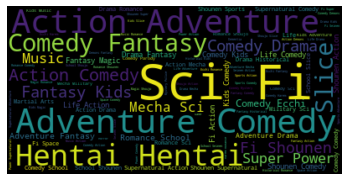

In [29]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in data_df.genre)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#fig= plt.figure(figsize=(100,100))
plt.savefig("Word_Cloud.png", format="png")
plt.show()


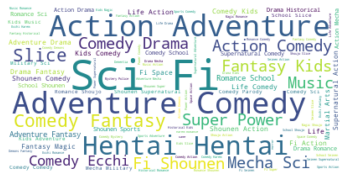

In [30]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
#ETL Challenge process background
#1.	I downloaded the top 50 anime and manga titles from animenewsnetwork
#a.	"https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=172"
#b.	"https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=173")
#2.	Using the xml.etree.Elementree module I converted both XMLs to Dataframes
#3.	Using panda df.merge, I outer merged both converted Dataframes into one list_df Dataframe
#4.	I then used dtypes to determine the type of each column
#5.	For all columns which had numerical values I converted the columns from objects to float64 types
#6.	Next I moved the Manga name column from the end next to the Anime name column
#7.	Finally I sorted the final Dataframe by nb_seen first and straight_average second, to ensure that any potential outliers are not being used for the top anime and manga categories
#8. I also made two plotly treemaps, one for anime and for manga, the treemap allows you to see the information for the top 50 animes and the top 50 mangas in order visually.  They were exported in html format to allow for them to be added to the webpage we created
#9.  I created a wordcloud using the genre information within the .csv file to visually demostrate what genre's categories are the most popular (note: there are over 300k words used in the .csv document)
